In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = pd.read_csv(r"C:\Users\David gathara marigi\Downloads\Bank_Churn.csv")  
print(data.head(6))

   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   
5    15574012       Chu          645     Spain    Male   44       8   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   
5  113755.78              2          1              

In [62]:
print(data.isna().sum())
#Has no missing values

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [63]:
print(data.duplicated().sum())
# has no duplicates

0


In [64]:
print(data.columns)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


In [65]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


Churn Rate: 20.37%


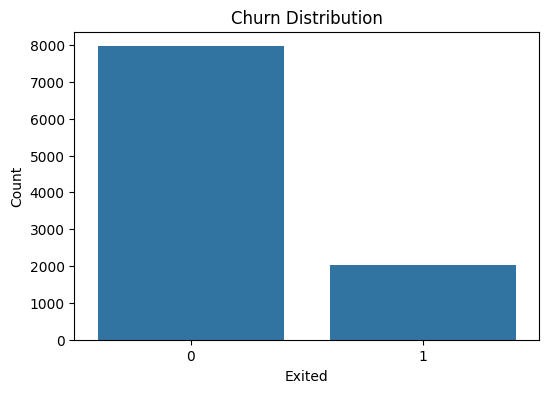

In [66]:
# Calculate churn rate
churn_rate = data['Exited'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

# Visualize churn rate
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=data)
plt.title('Churn Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

In [67]:
#feature engineering
# Create new features
data['BalanceToSalaryRatio'] = data['Balance'] / data['EstimatedSalary']
data['AgeGroup'] = pd.cut(data['Age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])
data['TenureGroup'] = pd.cut(data['Tenure'], bins=[0, 2, 5, 10], labels=['0-2', '3-5', '6+'])

# Display new features
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceToSalaryRatio,AgeGroup,TenureGroup
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,31-45,0-2
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,31-45,0-2
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,31-45,6+
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,31-45,0-2
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,31-45,0-2


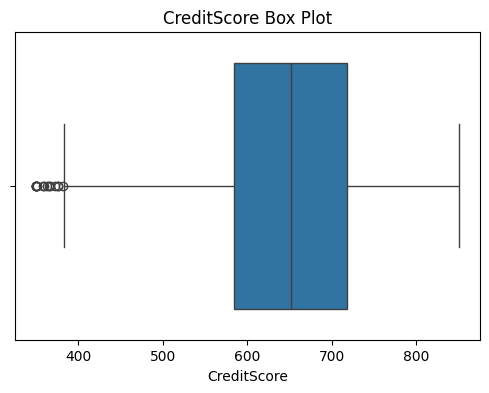

In [68]:
#outliers detection
# Box plot for CreditScore
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['CreditScore'])
plt.title('CreditScore Box Plot')
plt.show()

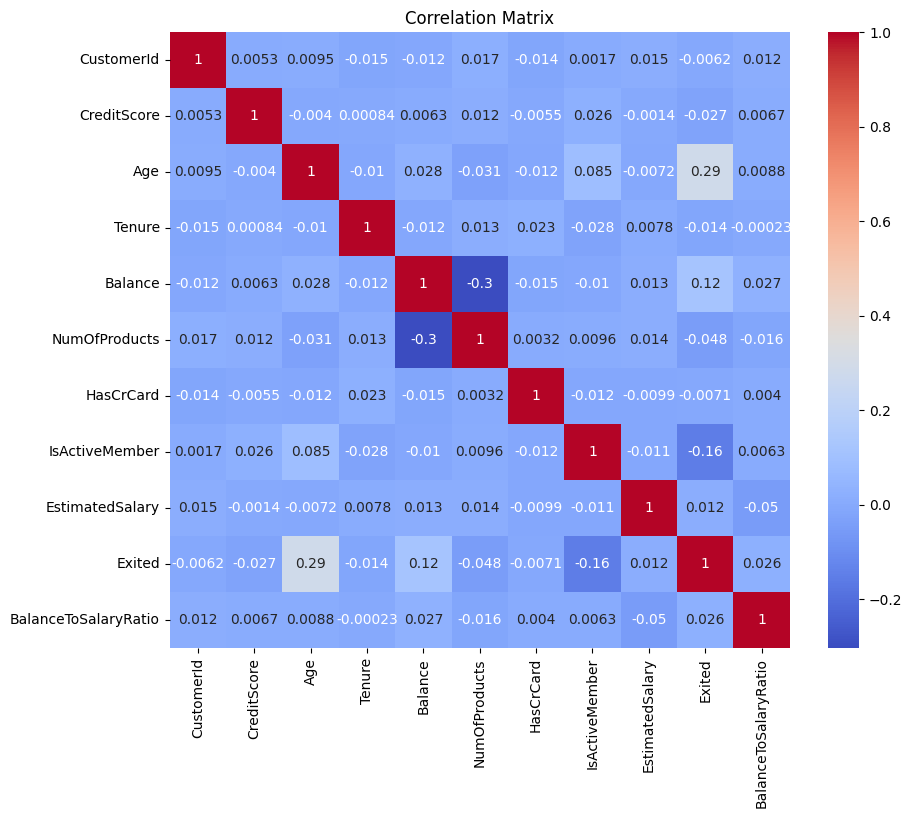

In [70]:
#correlation analysis
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
# Correlation matrix
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

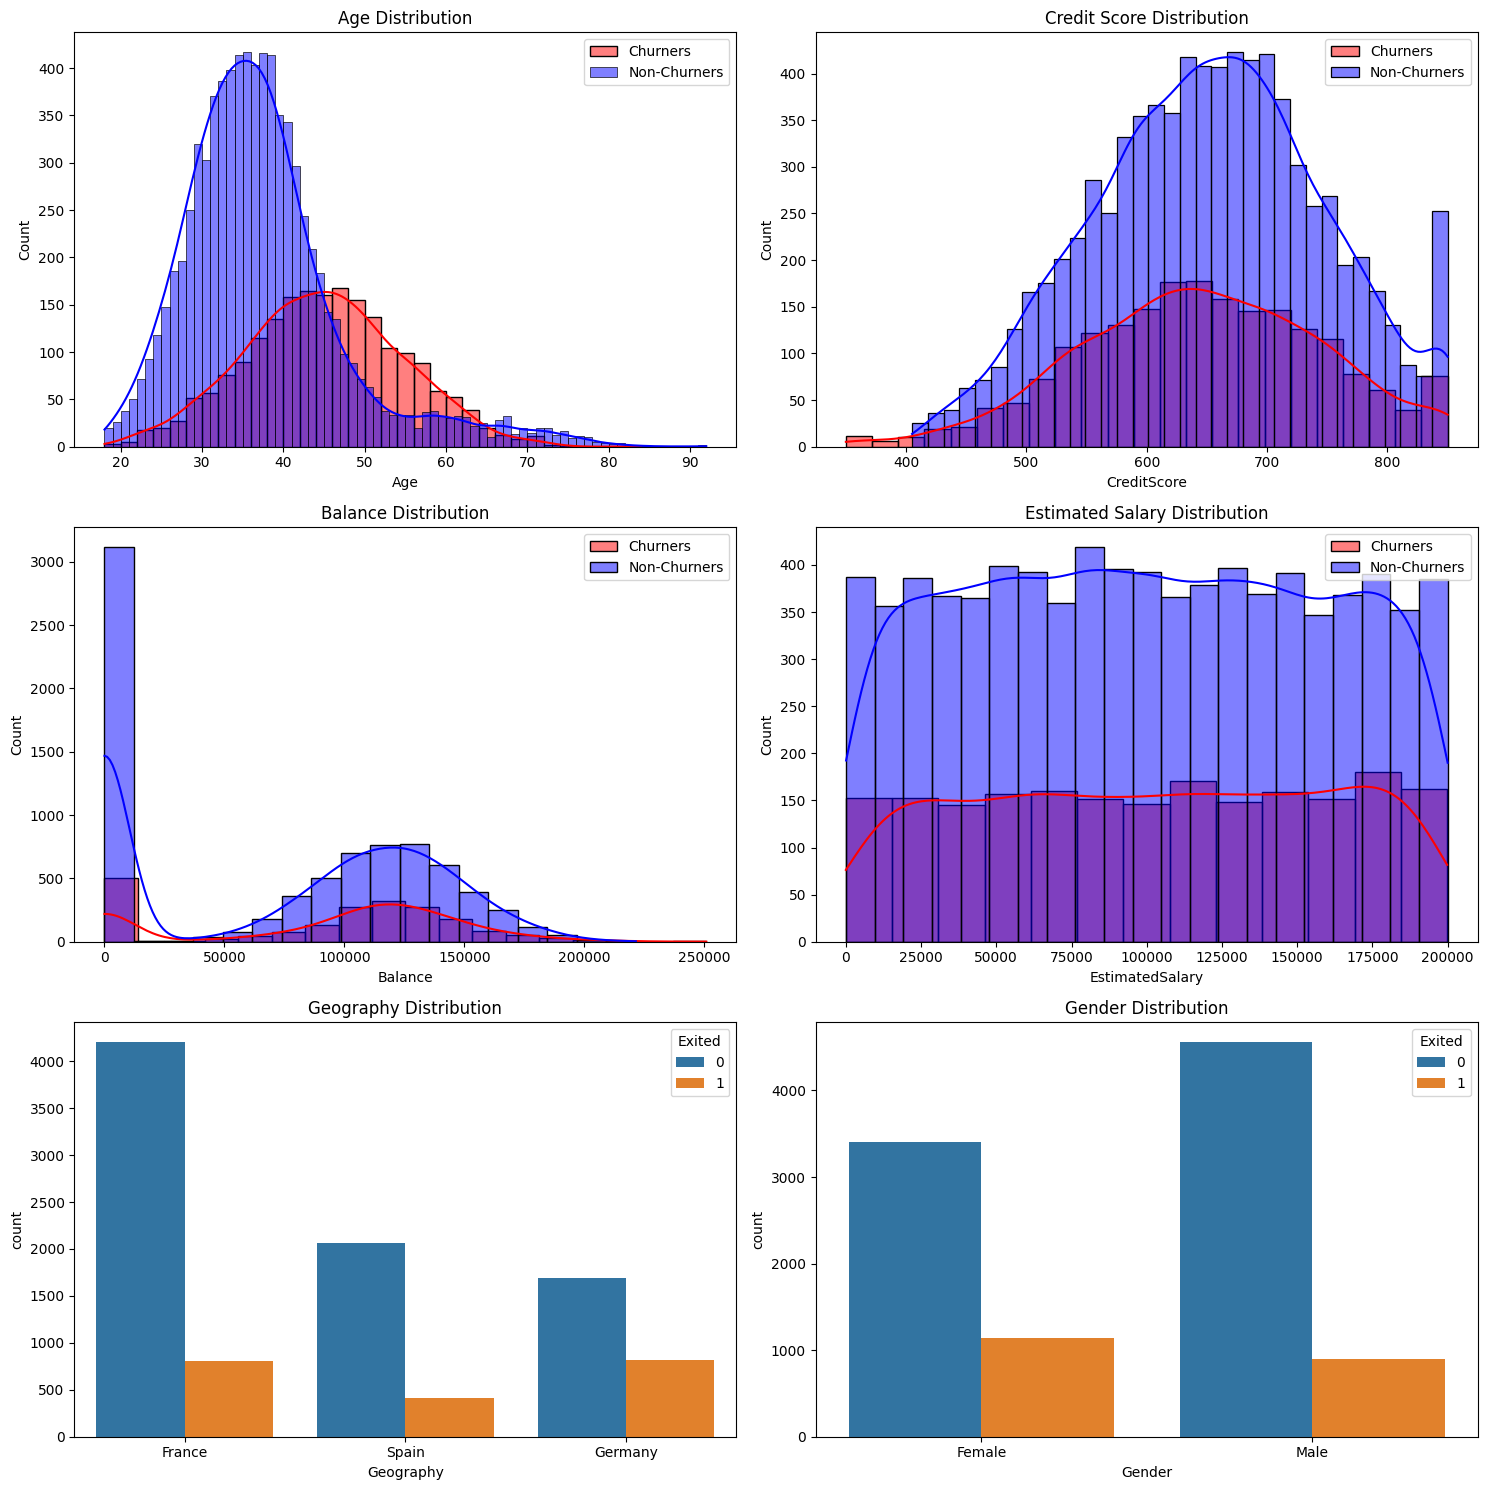

In [ ]:
# Separate churners and non-churners
churners = data[data['Exited'] == 1]
non_churners = data[data['Exited'] == 0]

# Compare distributions of different attributes
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(churners['Age'], kde=True, color='red', label='Churners', ax=axes[0, 0])
sns.histplot(non_churners['Age'], kde=True, color='blue', label='Non-Churners', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].legend()

sns.histplot(churners['CreditScore'], kde=True, color='red', label='Churners', ax=axes[0, 1])
sns.histplot(non_churners['CreditScore'], kde=True, color='blue', label='Non-Churners', ax=axes[0, 1])
axes[0, 1].set_title('Credit Score Distribution')
axes[0, 1].legend()

sns.histplot(churners['Balance'], kde=True, color='red', label='Churners', ax=axes[1, 0])
sns.histplot(non_churners['Balance'], kde=True, color='blue', label='Non-Churners', ax=axes[1, 0])
axes[1, 0].set_title('Balance Distribution')
axes[1, 0].legend()

sns.histplot(churners['EstimatedSalary'], kde=True, color='red', label='Churners', ax=axes[1, 1])
sns.histplot(non_churners['EstimatedSalary'], kde=True, color='blue', label='Non-Churners', ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary Distribution')
axes[1, 1].legend()

sns.countplot(x='Geography', hue='Exited', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Geography Distribution')

sns.countplot(x='Gender', hue='Exited', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

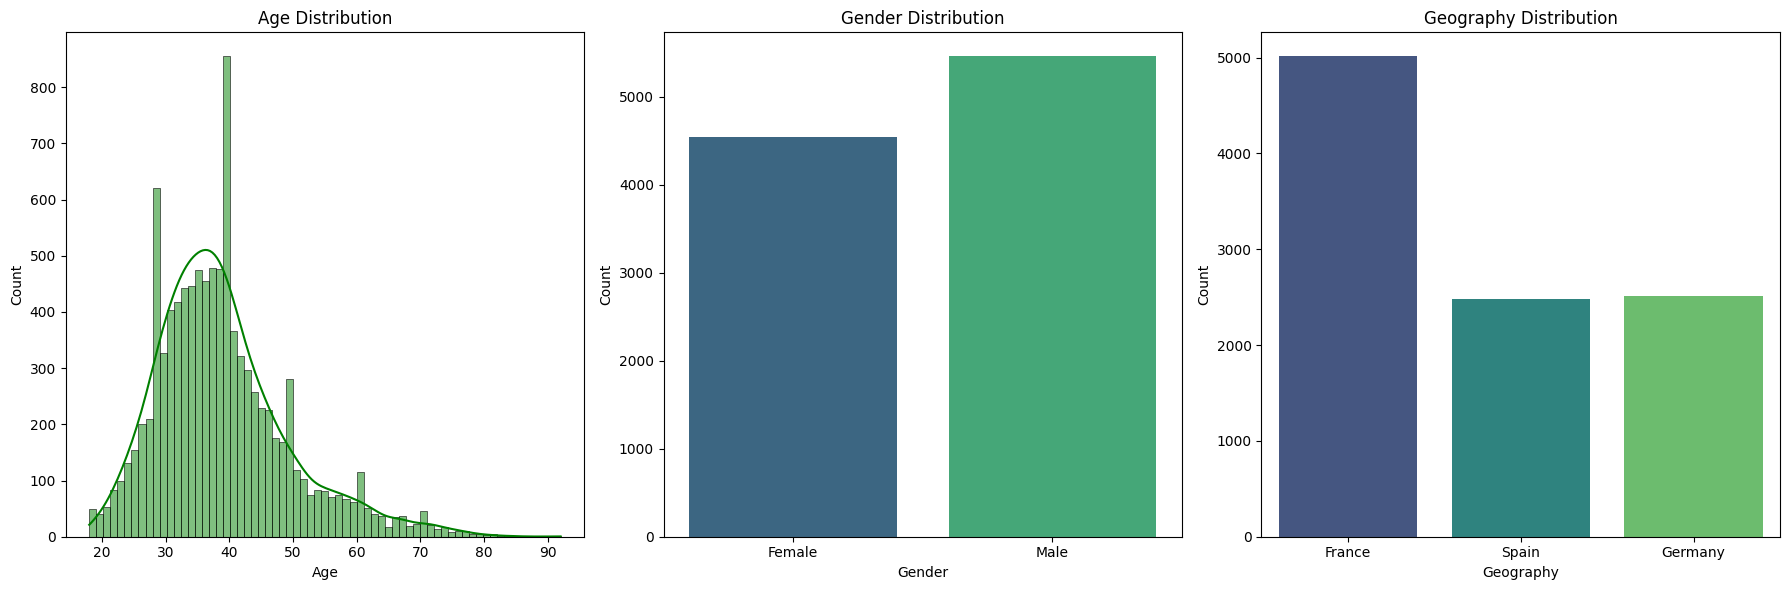

In [ ]:



# Overall demographics of the bank's customers
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Age distribution
sns.histplot(data['Age'], kde=True, ax=axes[0], color='green')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Gender distribution
sns.countplot(x='Gender', data=data, hue='Gender', ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Geography distribution
sns.countplot(x='Geography', data=data, hue='Geography', ax=axes[2], palette='viridis', legend=False)
axes[2].set_title('Geography Distribution')
axes[2].set_xlabel('Geography')
axes[2].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()





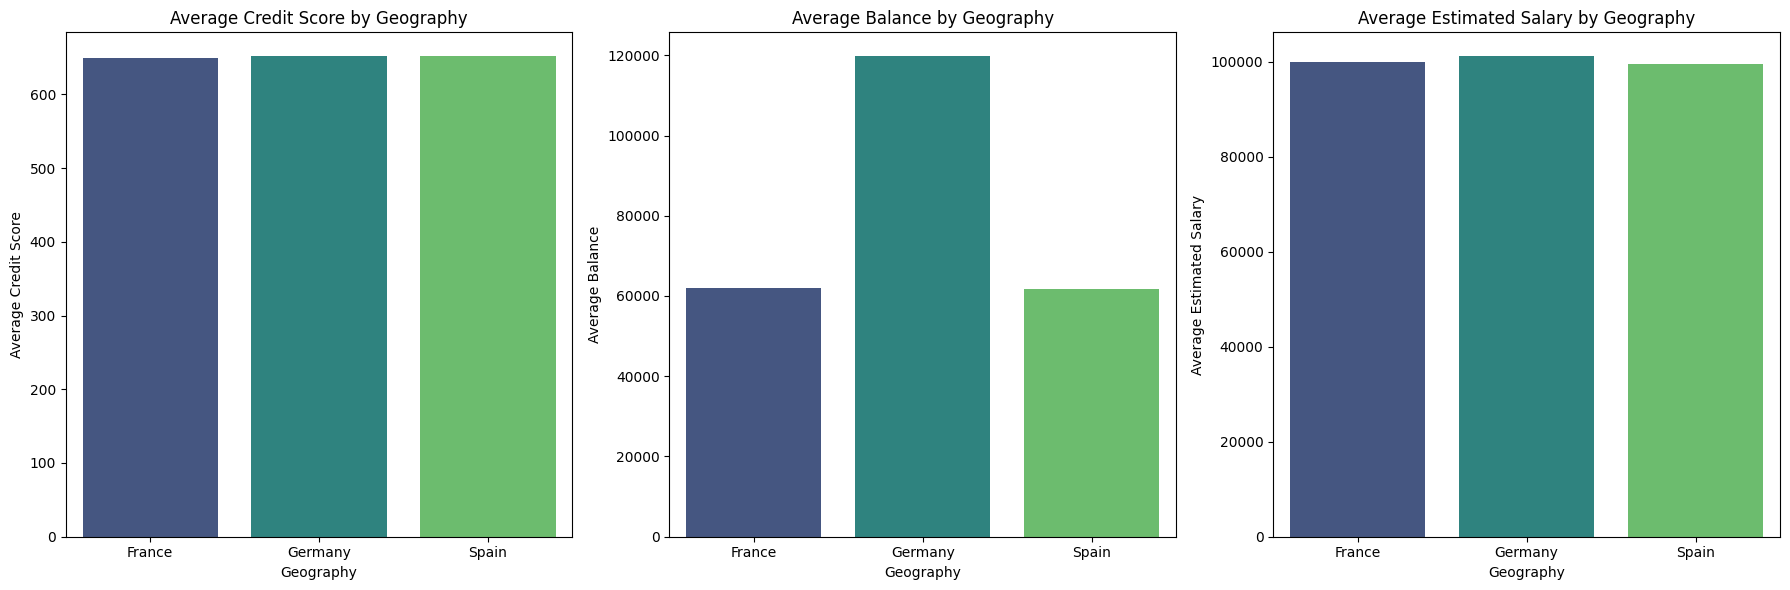

In [ ]:
# Group data by Geography and calculate the mean for numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
grouped_data = data.groupby('Geography')[numeric_columns].mean()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'data' is a valid DataFrame and contains the required columns
# Example: data = pd.read_csv('your_data.csv')

# Select numeric columns and group by 'Geography'
numeric_columns = data.select_dtypes(include=[np.number]).columns
grouped_data = data.groupby('Geography')[numeric_columns].mean()

# Plot the comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Credit Score comparison
sns.barplot(x=grouped_data.index, y=grouped_data['CreditScore'], hue=grouped_data.index, ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Average Credit Score by Geography')
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Average Credit Score')

# Balance comparison
sns.barplot(x=grouped_data.index, y=grouped_data['Balance'], hue=grouped_data.index, ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Average Balance by Geography')
axes[1].set_xlabel('Geography')
axes[1].set_ylabel('Average Balance')

# Estimated Salary comparison
sns.barplot(x=grouped_data.index, y=grouped_data['EstimatedSalary'], hue=grouped_data.index, ax=axes[2], palette='viridis', legend=False)
axes[2].set_title('Average Estimated Salary by Geography')
axes[2].set_xlabel('Geography')
axes[2].set_ylabel('Average Estimated Salary')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



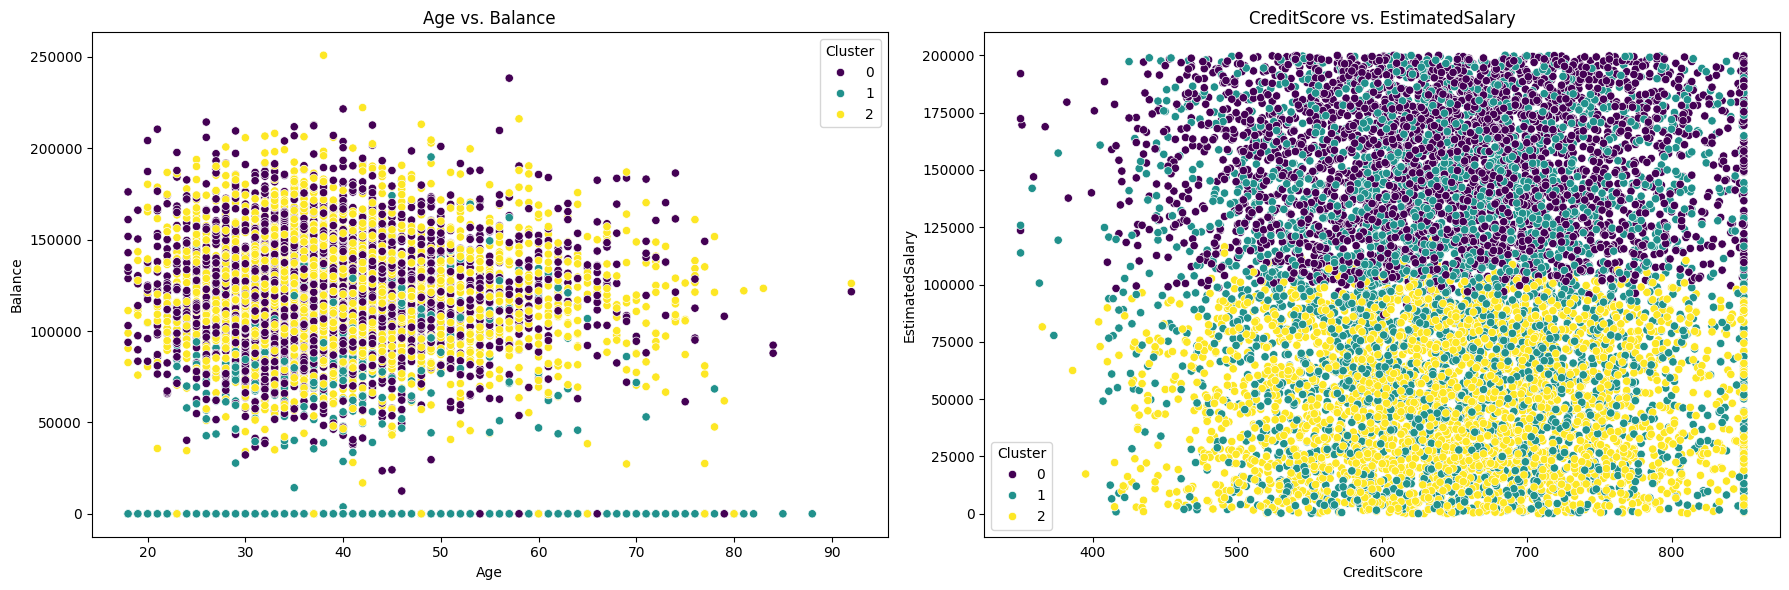

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Age vs. Balance
sns.scatterplot(x='Age', y='Balance', hue='Cluster', data=data, palette='viridis', ax=axes[0])
axes[0].set_title('Age vs. Balance')

# Plot CreditScore vs. EstimatedSalary
sns.scatterplot(x='CreditScore', y='EstimatedSalary', hue='Cluster', data=data, palette='viridis', ax=axes[1])
axes[1].set_title('CreditScore vs. EstimatedSalary')

plt.tight_layout()
plt.show()

# Data Story: Bank Customer Churn Analysis

## Introduction

In this analysis above we explored a dataset of bank customers to understand the factors contributing to customer churn. We use various data visualization techniques and clustering methods to gain insights into the demographics and behaviors of churners and non-churners.

## Data Overview
We start by loading the dataset and examining its structure. The dataset contains information about 10,000 bank customers, including their credit scores, geography, gender, age, tenure, balance, number of products, credit card status, activity status, estimated salary, and whether they have exited (churned).

## Data Cleaning
We checked for missing values and duplicates in the dataset. The dataset has no missing values or duplicates, ensuring the integrity of our analysis.

## Exploratory Data Analysis
### Distribution of Attributes
We separated the data into churners and non-churners and compared the distributions of various attributes:

- **Age Distribution**: Churners tend to be older compared to non-churners.
- **Credit Score Distribution**: Churners generally have lower credit scores.
- **Balance Distribution**: Churners have higher account balances.
- **Estimated Salary Distribution**: No significant difference between churners and non-churners.
- **Geography Distribution**: Higher churn rates in Germany.
- **Gender Distribution**: Higher churn rates among female customers.

### Overall Demographics
We also visualized the overall demographics of the customers:

- **Age Distribution**: Most customers are between 30 and 40 years old.
- **Gender Distribution**: Slightly more male customers than female.
- **Geography Distribution**: Customers are distributed across France, Germany, and Spain.

### Geographic Analysis
We grouped the data by geography and calculated the mean for numeric columns:

- **Credit Score**: Similar across geographies.
- **Balance**: Higher in Germany.
- **Estimated Salary**: Similar across geographies.

## Clustering Analysis
We performed KMeans clustering to identify distinct customer segments based on their credit score, age, tenure, balance, number of products, and estimated salary. We identified three clusters:

- **Cluster 0**: Customers with moderate credit scores and balances.
- **Cluster 1**: Customers with lower credit scores and higher balances.
- **Cluster 2**: Customers with higher credit scores and moderate balances.

## Recommendations for Stakeholders
To optimize profits and reduce churn, stakeholders should consider the following actions:

1. **Targeted Retention Strategies**: Focus on retaining older customers and those with higher balances, as they are more likely to churn.
2. **Credit Score Improvement Programs**: Implement programs to help customers improve their credit scores, reducing the likelihood of churn.
3. **Geographic-Specific Campaigns**: Develop targeted campaigns for customers in Germany, where churn rates are higher.
4. **Gender-Specific Initiatives**: Address the higher churn rates among female customers with tailored retention strategies.
5. **Customer Segmentation**: Use the identified clusters to create personalized marketing and retention strategies for different customer segments.

By implementing these strategies, the bank can enhance customer satisfaction, reduce churn, and ultimately optimize profits.

---

